<a href="https://colab.research.google.com/github/wendianaxu/speech-emotion-recognition/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'librosa'

In [ ]:
!git clone https://github.com/wendianaxu/speech-emotion-recognition.git

Cloning into 'speech-emotion-recognition'...
remote: Enumerating objects: 1497, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1497 (delta 5), reused 25 (delta 5), pack-reused 1469
Receiving objects: 100% (1497/1497), 213.82 MiB | 20.42 MiB/s, done.
Resolving deltas: 100% (244/244), done.
Updating files: 100% (2883/2883), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

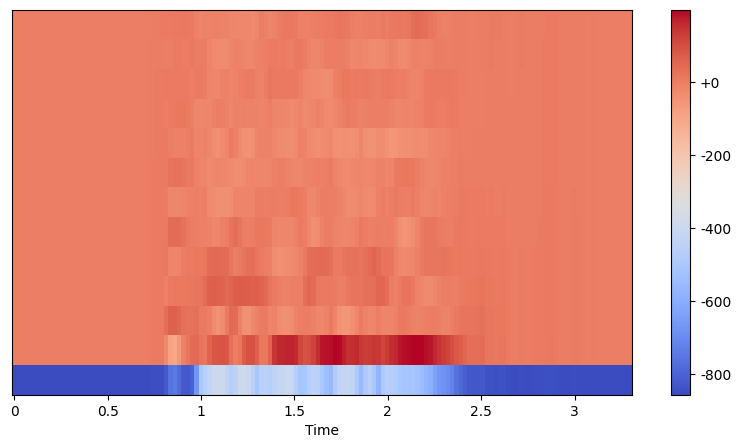

In [ ]:
# test: load an audio file, extract mfccs, and visualize

test_file = "/content/speech-emotion-recognition/RAVDESS_data/Actor_01/03-01-01-01-01-01-01.wav"
n_mfcc = 13 # common choice
sr = 22050 # sampling rate

# visualize mfccs
audio, sampling_rate = librosa.load(test_file, sr=sr, duration=None)
test_mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

plt.figure(figsize=(10, 5))
librosa.display.specshow(test_mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


In [ ]:
# function for loading an audio file
data_path = "/content/speech-emotion-recognition/RAVDESS_data/"
def load_file(path):
  '''
  Load one audio file and return an 1D array containing its mfccs averaged across time
  '''
  audio, sampling_rate = librosa.load(path, sr=sr, duration=None)
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc) # extract MFCC matrix (cols = coefficients, rows = time)
  features = np.mean(mfccs.T, axis=0)  # condense MFCC matrix into 1D array, averaging each coefficient across time
  return features

load_file(test_file)


In [ ]:
# function for preprocessing data
def preprocess_data(path):
  '''
  Preprocess data in all folders within the dataset. 
  '''
  X = []
  y = []
  for folder in os.listdir(path): # each folder = one actor
      for file in os.listdir(os.path.join(path, folder)):
          if file.endswith('.wav'):
              emotion = file.split('-')[2] # get emotion label
              if int(emotion) == 1:
                  label = 'Neutral'
              elif int(emotion) == 2:
                  label = 'Calm'
              elif int(emotion) == 3:
                  label = 'Happy'
              elif int(emotion) == 4:
                  label = 'Sad'
              elif int(emotion) == 5:
                  label = 'Angry'
              elif int(emotion) == 6:
                  label = 'Fearful'
              elif int(emotion) == 7:
                  label = 'Disgust'
              elif int(emotion) == 8:
                  label = 'Surprised'
              else:
                  label = 'UNK'
                  
              file_path = os.path.join(path, folder, file)
              features = load_file(file_path)
              X.append(features)
              y.append(label)
  return np.array(X), np.array(y)


Shape of X: (1440, 13)
Shape of y: (1440,)


In [ ]:
X, y = preprocess_data(data_path)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
# inspect training data
import pandas as pd
df = pd.DataFrame(X_train)
df["label"] = y_train

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-550.410706,65.115974,-2.515672,10.579401,13.258023,-1.245057,-1.945701,-4.436501,-6.648713,1.510386,-3.106131,-1.299466,-1.383189,Disgust
1,-449.255615,44.872730,-10.503033,4.327963,0.450368,-9.869686,1.562601,-2.047668,-8.703349,-0.105613,-4.688169,-0.417763,-2.481066,Angry
2,-612.029053,68.371361,0.246289,11.889709,2.951385,-2.587057,-3.435470,-5.571574,-8.305638,-0.891437,2.646821,-3.349976,-1.120280,Happy
3,-702.416138,76.888893,14.526176,24.579590,18.013536,1.145207,-0.617176,-0.802158,4.786394,0.019175,-0.432699,3.455811,0.539338,Surprised
4,-562.613281,49.607361,10.166953,15.956978,3.044477,3.288087,2.740135,-1.315588,-6.198551,-1.548467,6.139304,-1.397438,-0.779526,Disgust


In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [ ]:
def visualize_by_statement(path, intensity = '01', repetition = '01', actor = '01'):
  '''
   
  '''
  X = []
  y = []
  color = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
  x_values = range(13)
  for file in os.listdir(os.path.join(path, 'Actor_'+ actor)):
      if file.split('-')[3] == intensity and file.split('-')[5] == repetition:
          emotion = file.split('-')[2] # get emotion label
          if int(emotion) == 1:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[0])
          elif int(emotion) == 2:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[1])
          elif int(emotion) == 3:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[2])
          elif int(emotion) == 4:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[3])
          elif int(emotion) == 5:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[4])
          elif int(emotion) == 6:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[5])
          elif int(emotion) == 7:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[6])
          elif int(emotion) == 8:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[7])
  
  plt.xlabel('Features')
  plt.ylabel('MFCC Values')
  plt.legend()
  plt.show()

In [4]:
visualize_by_statement(data_path)

NameError: name 'data_path' is not defined

In [ ]:
# sort emotions into bins
Neutral = []
Calm = []
Happy = []
Sad = []
Angry = []
Fearful = []
Disgust = []
Surprised = []
UNK = []

def emo_classification(X, y):
  for i in range(X.shape[0]):
    if y[i] == 'Neutral':
      Neutral.append(X[i])
    elif y[i] == 'Calm':
      Calm.append(X[i])
    elif y[i] == 'Happy':
      Happy.append(X[i])
    elif y[i] == 'Sad':
      Sad.append(X[i])
    elif y[i] == 'Angry':
      Angry.append(X[i])
    elif y[i] == 'Fearful':
      Fearful.append(X[i])
    elif y[i] == 'Disgust':
      Disgust.append(X[i])
    elif y[i] == 'Surprised':
      Surprised.append(X[i])
    elif y[i] == 'UNK':
      UNK.append(X[i])

emo_classification(X, y)